In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset = pd.read_csv("wdbc.data", sep=",").values



#Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1_temp = X1
min_val = np.min(X1,axis=0)
max_val = np.max(X1,axis=0)
X1 = np.divide((X1-min_val),(max_val-min_val))
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
min_val = np.min(X2,axis=0)
max_val = np.max(X2,axis=0)
X2 = np.divide((X2-min_val),(max_val-min_val))
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3_temp = X3
min_val = np.min(X3,axis=0)
max_val = np.max(X3,axis=0)
X3 = np.divide((X3-min_val),(max_val-min_val))
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
min_val = np.min(X4,axis=0)
max_val = np.max(X4,axis=0)
X4 = np.divide((X4-min_val),(max_val-min_val))
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
min_val = np.min(X5,axis=0)
max_val = np.max(X5,axis=0)
X5 = np.divide((X5-min_val),(max_val-min_val))
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)

# Mean and Maximum
X6 = np.concatenate([X1_temp,X3_temp],axis=1)
X6 = X6.astype("float64")
min_val = np.min(X6,axis=0)
max_val = np.max(X6,axis=0)
X6 = np.divide((X6-min_val),(max_val-min_val))
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
min_val = np.min(X7,axis=0)
max_val = np.max(X7,axis=0)
X7 = np.divide((X7-min_val),(max_val-min_val))
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)


labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate(final_data):
    report = np.empty([4,6])
    m,n = final_data.shape
    for i in range(5):
        np.random.seed(0)
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        logisticRegr = LogisticRegression()
        logisticRegr.fit(x_train,y_train)
        predictions = logisticRegr.predict(x_train)
        report[0,i] = classification_report(y_train,predictions,output_dict = True).get('accuracy')
        report[1,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('precision')
        report[2,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('recall')
        report[3,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('f1-score')
        cm = metrics.confusion_matrix(y_train, predictions)
        print("Confusion matrix:\n",cm)
        
    for j in range(4):
        report[j,5] = np.max(report[j,0:5])
    columns1 = ['Validation 1','Validation 2','Validation 3','Validation 4','Validation 5','Maximum']
    index1 = ['Accuracy','Precision','Recall','F1-Score']
    table = pd.DataFrame(data = report,columns=columns1,index=index1)
    display(table)


## Mean

In [4]:
# Mean
evaluate(final_data1)

Confusion matrix:
 [[277   5]
 [ 21 151]]
Confusion matrix:
 [[283   5]
 [ 25 141]]
Confusion matrix:
 [[283   5]
 [ 28 138]]
Confusion matrix:
 [[275   7]
 [ 24 148]]
Confusion matrix:
 [[284   5]
 [ 21 144]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.942731,0.933921,0.927313,0.931718,0.942731,0.942731
Precision,0.948739,0.942292,0.937501,0.937286,0.948795,0.948795
Recall,0.930088,0.916018,0.906982,0.917821,0.927713,0.930088
F1-Score,0.937952,0.926755,0.919056,0.925921,0.936713,0.937952


## Standard Error

In [5]:
# Standard Error
evaluate(final_data2)

Confusion matrix:
 [[269  13]
 [ 77  95]]
Confusion matrix:
 [[277  11]
 [ 74  92]]
Confusion matrix:
 [[278  10]
 [ 75  91]]
Confusion matrix:
 [[273   9]
 [ 79  93]]
Confusion matrix:
 [[279  10]
 [ 70  95]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.801762,0.812775,0.812775,0.806167,0.823789,0.823789
Precision,0.828543,0.841189,0.844263,0.843666,0.852094,0.852094
Recall,0.753113,0.758011,0.756735,0.754391,0.770578,0.770578
F1-Score,0.767630,0.775497,0.774521,0.770015,0.789156,0.789156


## Maximum

In [6]:
# Maximum
evaluate(final_data3)

Confusion matrix:
 [[280   2]
 [ 18 154]]
Confusion matrix:
 [[286   2]
 [ 17 149]]
Confusion matrix:
 [[285   3]
 [ 17 149]]
Confusion matrix:
 [[280   2]
 [ 15 157]]
Confusion matrix:
 [[287   2]
 [ 16 149]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.955947,0.958150,0.955947,0.962555,0.960352,0.962555
Precision,0.963388,0.965325,0.961986,0.968287,0.966975,0.968287
Recall,0.944128,0.945323,0.943587,0.952849,0.948055,0.952849
F1-Score,0.952271,0.953957,0.951604,0.959589,0.956316,0.959589


## Mean and Standard Error

In [7]:
# Mean and Standard Error
evaluate(final_data4)

Confusion matrix:
 [[278   4]
 [ 22 150]]
Confusion matrix:
 [[285   3]
 [ 25 141]]
Confusion matrix:
 [[285   3]
 [ 28 138]]
Confusion matrix:
 [[279   3]
 [ 24 148]]
Confusion matrix:
 [[286   3]
 [ 22 143]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.942731,0.938326,0.931718,0.940529,0.944934,0.944934
Precision,0.950346,0.949261,0.944633,0.950462,0.954012,0.954012
Recall,0.928954,0.919490,0.910454,0.924913,0.928143,0.928954
F1-Score,0.937786,0.931427,0.923721,0.935127,0.938869,0.938869


## Standard Error and Maximum

In [8]:
# Standard Error and Maximum
evaluate(final_data5)

Confusion matrix:
 [[282   0]
 [ 18 154]]
Confusion matrix:
 [[286   2]
 [ 18 148]]
Confusion matrix:
 [[288   0]
 [ 17 149]]
Confusion matrix:
 [[280   2]
 [ 17 155]]
Confusion matrix:
 [[288   1]
 [ 17 148]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.960352,0.955947,0.962555,0.958150,0.960352,0.962555
Precision,0.970000,0.963728,0.972131,0.965011,0.968775,0.972131
Recall,0.947674,0.942311,0.948795,0.947035,0.946755,0.948795
F1-Score,0.956929,0.951463,0.958682,0.954717,0.956186,0.958682


## Mean and Maximum

In [9]:
# Mean and Maximum:

evaluate(final_data6)

Confusion matrix:
 [[281   1]
 [ 12 160]]
Confusion matrix:
 [[286   2]
 [ 15 151]]
Confusion matrix:
 [[286   2]
 [ 12 154]]
Confusion matrix:
 [[278   4]
 [ 10 162]]
Confusion matrix:
 [[288   1]
 [ 15 150]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.971366,0.962555,0.969163,0.969163,0.964758,0.971366
Precision,0.976417,0.968547,0.973456,0.970591,0.971936,0.976417
Recall,0.963343,0.951347,0.960383,0.963838,0.952815,0.963838
F1-Score,0.969176,0.958923,0.966315,0.967009,0.961170,0.969176


## Mean, Standard Error and Maximum

In [10]:
# Mean, Standard Error and Maximum
evaluate(final_data7)

Confusion matrix:
 [[282   0]
 [ 12 160]]
Confusion matrix:
 [[288   0]
 [ 15 151]]
Confusion matrix:
 [[287   1]
 [ 13 153]]
Confusion matrix:
 [[281   1]
 [ 11 161]]
Confusion matrix:
 [[288   1]
 [ 13 152]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.973568,0.966960,0.969163,0.973568,0.969163,0.973568
Precision,0.979592,0.975248,0.975087,0.978078,0.975137,0.979592
Recall,0.965116,0.954819,0.959107,0.966250,0.958876,0.966250
F1-Score,0.971511,0.963650,0.966220,0.971583,0.966123,0.971583


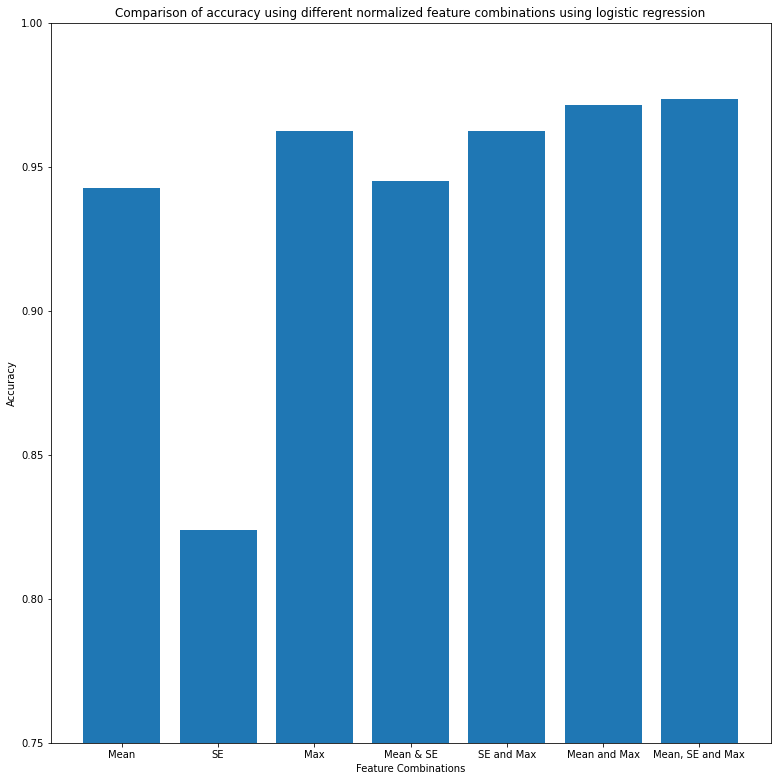

In [11]:
# The bar graph below shows the accuracy for the training set. A similar procedure was followed for the test set as well.
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
feature_comb = ['Mean', 'SE', 'Max', 'Mean & SE', 'SE and Max', 'Mean and Max', 'Mean, SE and Max']
accuracy = [0.9427,0.8238,0.9625,0.9449,0.9626,0.9714,0.9736]
ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of accuracy using different normalized feature combinations using logistic regression')
ax.set_ylim([0.75,1])
plt.show()